Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/CustomerBehave.xlsx')

In [ ]:
# duplicate rows
duplicated_rows = df[df.duplicated(keep=False)]

# Number of duplicate rows
print(f"Duplicated rows are {duplicated_rows.shape[0]}")

Duplicated rows are 0


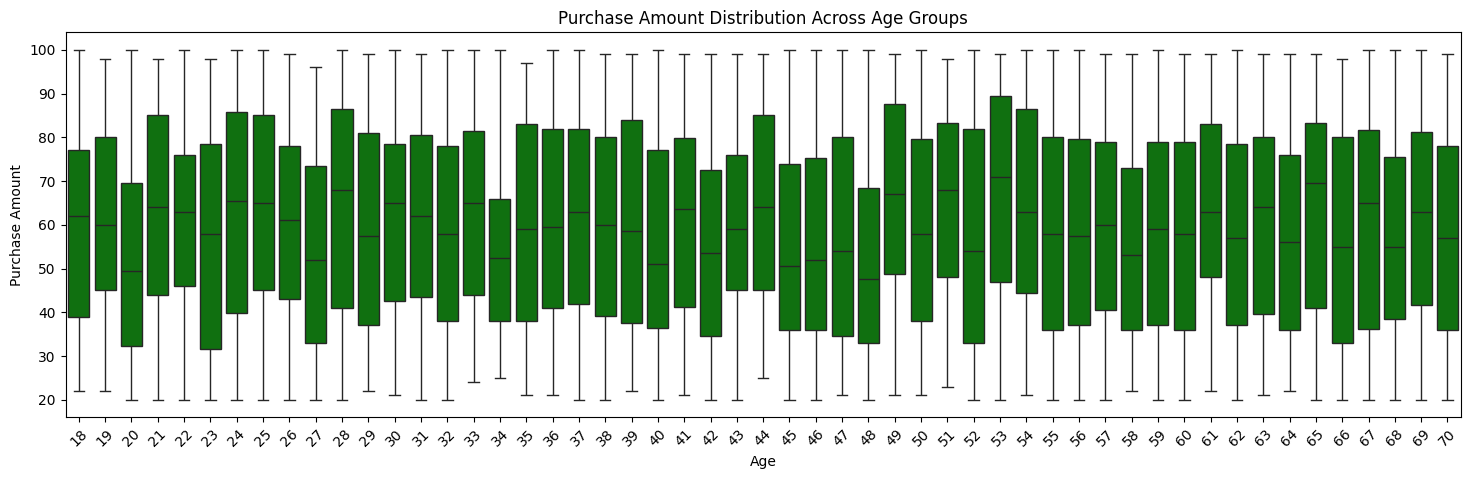

In [ ]:
# Box Plots for year
plt.figure(figsize = (18, 5))
sns.boxplot(x = 'Age', y = 'Purchase Amount (USD)', data = df, color="green")
plt.title('Purchase Amount Distribution Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-032b37890791>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


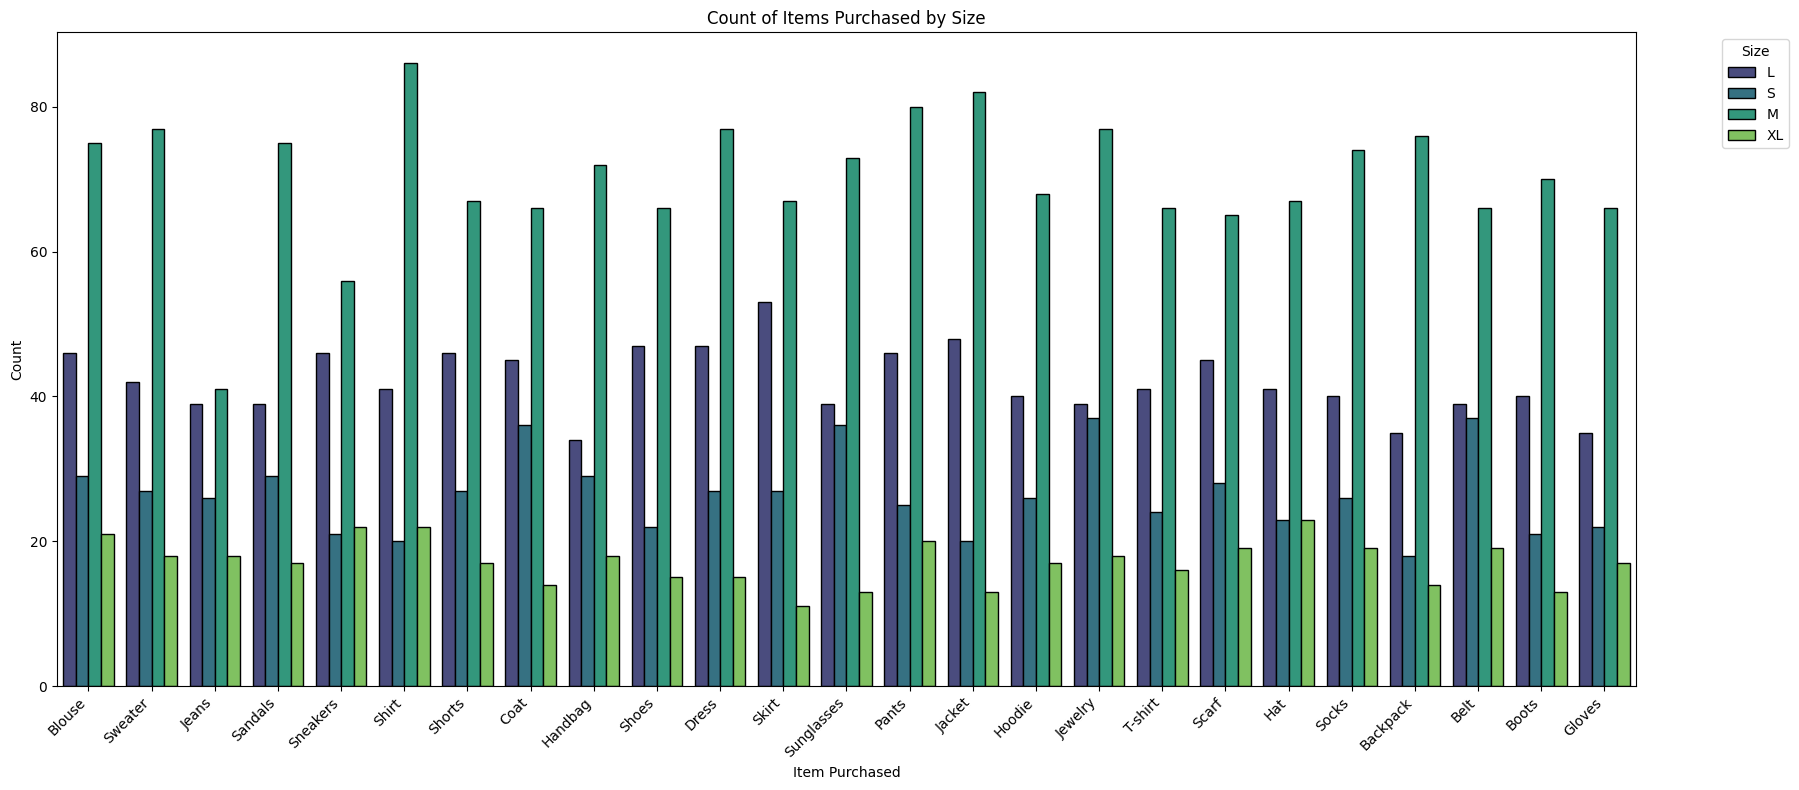

In [ ]:
#Count of items Purchased by Size
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,8))
ax = sns.countplot(x='Item Purchased', hue='Size', data=df, palette='viridis',edgecolor='k')
plt.title('Count of Items Purchased by Size')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.legend(title='Size',bbox_to_anchor=(1.05,1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

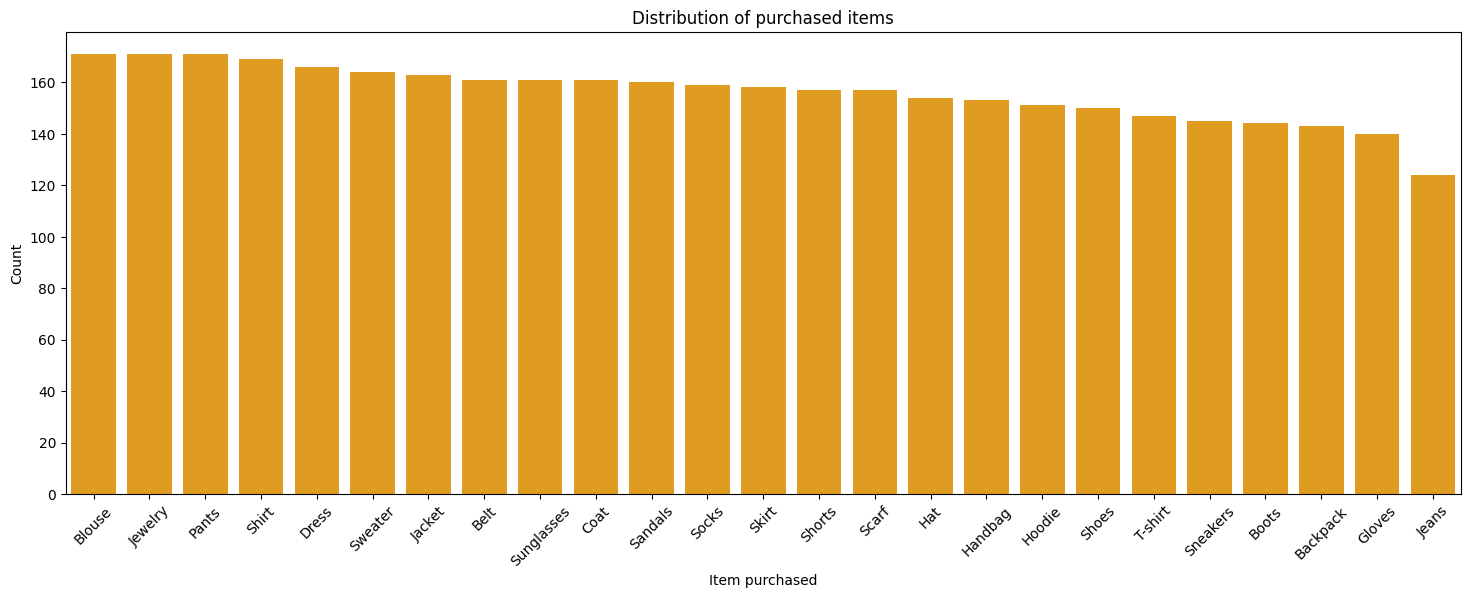

In [ ]:
#bar chart for purchased items
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='Item Purchased', order=df['Item Purchased'].value_counts().index, color="orange")
plt.xticks(rotation=45)
plt.title('Distribution of purchased items')
plt.xlabel('Item purchased')
plt.ylabel('Count')
plt.show()

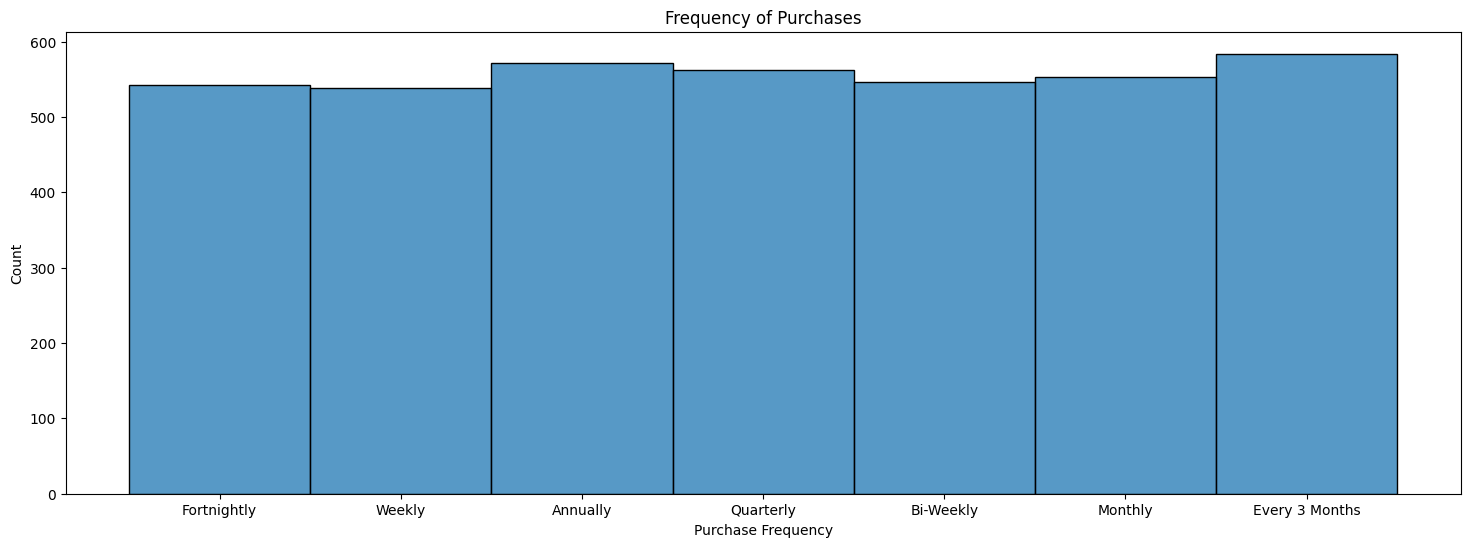

In [ ]:
# Purchased Frequency
plt.figure(figsize=(18, 6))
sns.histplot(df['Frequency of Purchases'], bins=30, kde=False)
plt.title('Frequency of Purchases')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.show()

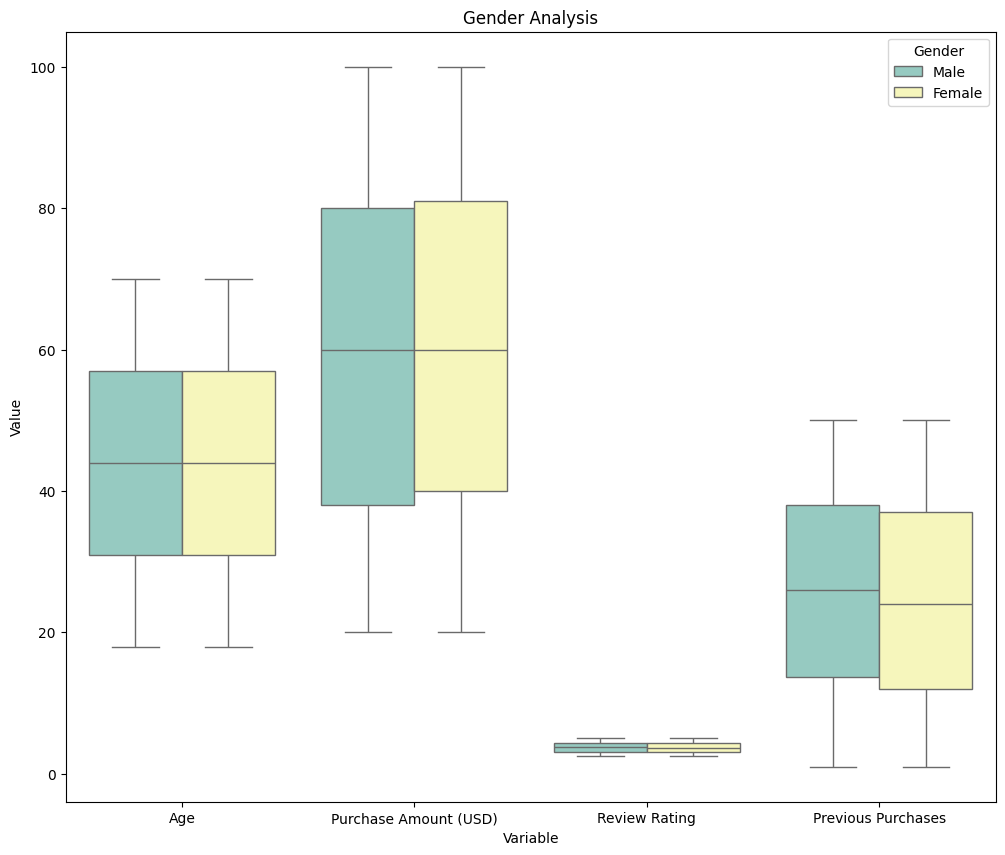

In [ ]:
# melt data to have variables in one column
data = pd.melt(df, id_vars='Gender', value_vars=['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'])

# boxplot data
plt.figure(figsize=(12, 10))
sns.boxplot(data=data, x='variable', y='value', hue='Gender', palette='Set3')
plt.title('Gender Analysis')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.legend(title='Gender', loc='upper right')
plt.show()

In [ ]:
df = df.drop(columns=['Customer ID']) # Remove 'Customer ID'
X = df.drop(columns=['Purchase Amount (USD)'])
y = df['Purchase Amount (USD)']

# Categorical Variables
categorical_cols = X.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

for col in categorical_cols:
    X[col] = X[col].astype('category').cat.codes

# Training and testing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Shape of training data: {X_train.shape}")

# Implementing model here random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Categorical columns: Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')
Shape of training data: (3120, 16)
Mean Squared Error: 570.7095847435897


Apply grid search technique to optimize random forest regressor.
here, param_grid is  hyperparameters of the RandomForestRegressor that we want to tune;
n_estimators: The number of trees in the forest;
max_depth: The maximum depth of each tree;
min_samples_split: The minimum number of samples required to split an internal node.
We have tried to use different combinations using GridSearchCV, we have used cross validation for for evaluation, also used negative mean absolute error which aims to decrease the error.

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Mitigating the best parameter
best_param = grid_search.best_params_
print("Best Parameters from GridSearchCV:")
print(best_param)

# training the model with best parameters
best_rf_model = grid_search.best_estimator_
y_pred_optimized = best_rf_model.predict(X_test)

Best Parameters from GridSearchCV:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
df['Predicted'] = rf_model.predict(X)

We have tried to do gender based analysis here, as we felt the gender distribution is the key feature in our dataset. We try to implement linear regression analysis for each of the gender. We also tried to plot the graph where nature of the graph shows analysis is good for the linear regression based on gender.

MSE for Actual vs Predicted Purchase Amounts (Male): 132.30531684442207


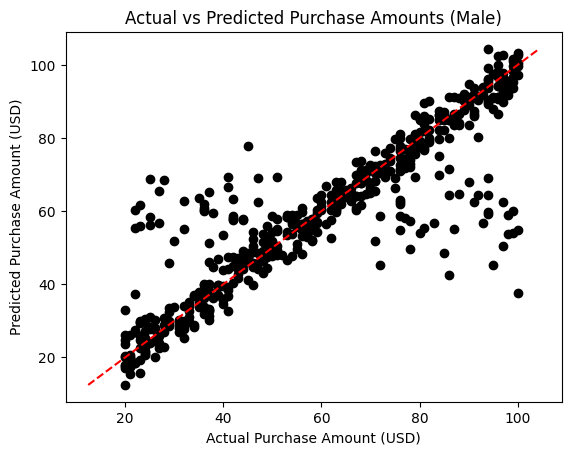

MSE for Actual vs Predicted Purchase Amounts (Female): 135.52672748867772


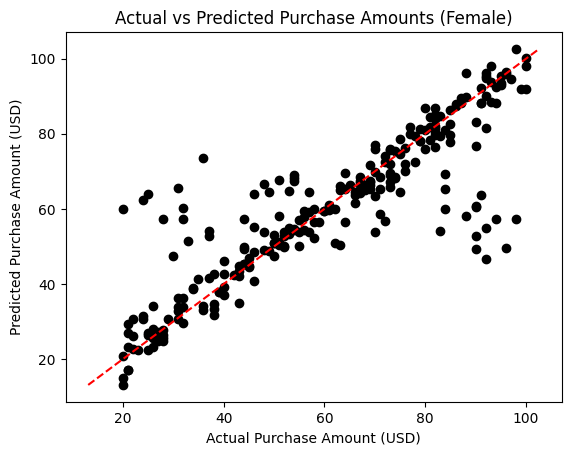

In [ ]:
# Linear Regression implemented
# Divide dataset into male and female
from sklearn.metrics import mean_squared_error

df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

def regression_plot(df, title):
    np.random.seed(0)
    X = df.drop(columns=['Purchase Amount (USD)', 'Gender'])
    y = df['Purchase Amount (USD)']

    categorical_cols = X.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        X[col] = X[col].astype('category').cat.codes

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for {title}: {mse}")

    # Actual vs predicted value scatter plot
    plt.scatter(y_test, y_pred, color="black")

    max_val = max(max(y_test), max(y_pred))
    min_val = min(min(y_test), min(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")

    plt.xlabel('Actual Purchase Amount (USD)')
    plt.ylabel('Predicted Purchase Amount (USD)')
    plt.title(title)
    plt.show()

regression_plot(df_male, 'Actual vs Predicted Purchase Amounts (Male)')
regression_plot(df_female, 'Actual vs Predicted Purchase Amounts (Female)')
#endregion